In [1]:
%matplotlib inline

import os
import pickle

from skimage.feature import hog
from skimage import color, io, transform

import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

In [2]:
STANDARD_SIZE = (100, 128)
def HOG(filename):
    im = io.imread(filename)
    image = color.rgb2gray(im)
    image = transform.resize(image, STANDARD_SIZE)
    fd = hog(image, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(4, 4), visualise=False)
    return fd

In [3]:
f = "../data/image_data/Bainbridge/Full Attribute Scores/psychology attributes/psychology-attributes.txt"
df = pd.read_csv(f)
img_files_w_scores = df['Filename']

In [11]:
if os.path.isfile("../data/image_data/tmp/XHOG.p"):
    print "file found, file loaded"
    X = pickle.load(open('../data/image_data/tmp/XHOG.p', 'r'))
else:
    img_dir = "../data/image_data/Bainbridge/10k US Adult Faces Database/Face Images/"
    X = []
    for image in img_files_w_scores:
        img = HOG(img_dir + image)
        X.append(img)
    X = np.array(X)
    pickle.dump(X, open("../data/image_data/tmp/XHOG.p", "wb"))

file found, file loaded


In [12]:
pca = decomposition.RandomizedPCA(n_components=100)
pca.fit(X)
pickle.dump(pca, open("../data/image_data/tmp/HOG_PCA.p", "wb"))
X2 = pca.transform(X)

In [13]:
pca.explained_variance_ratio_.sum()

0.64874376565381575

In [14]:
cols = list(df.columns.values)
cols = cols[2:]
cols = [x for x in cols if not (x.startswith('catch')) | (x.startswith('sub'))]

In [15]:
def train_test(X,y,label="none",standard_axis=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    
    clf = RidgeCV(np.logspace(-5, 10, 100))
    clf.fit(X_train, y_train)

    y_hat = clf.predict(X_test)
    MSE = mean_squared_error(y_test,y_hat)
    R2 = clf.score(X_test,y_test)

    plt.scatter(y_test,y_hat)
    plt.title(label + ", MSE=" + str(np.round(MSE,3)) + ", R^2=" + str(np.round(R2,3)))
    if standard_axis:
        plt.xlim(0, 10)
        plt.ylim(0, 10)
    plt.show()
    return label, MSE, R2, clf

/Users/phil/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


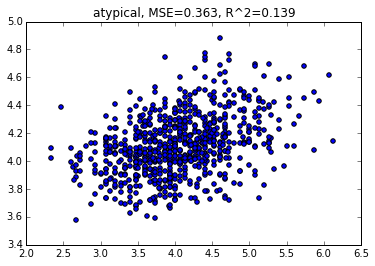

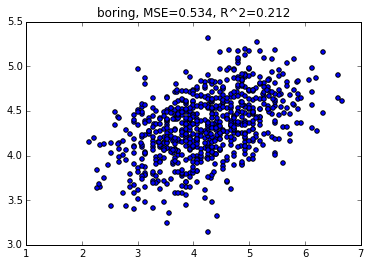

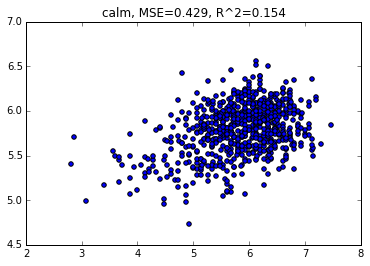

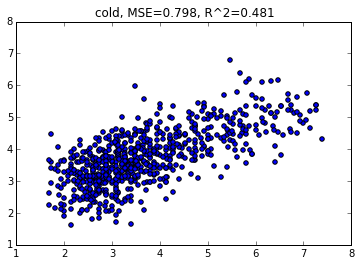

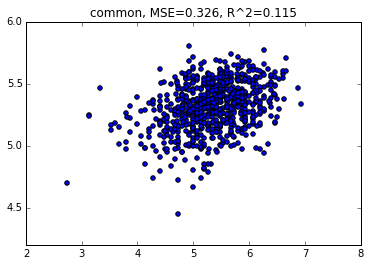

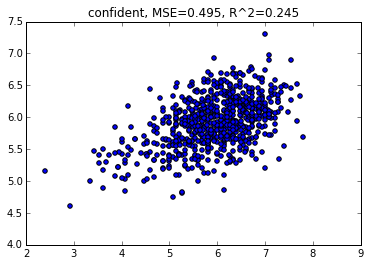

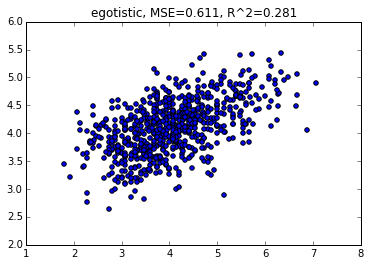

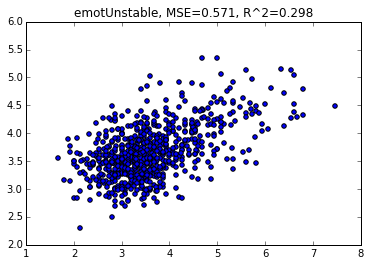

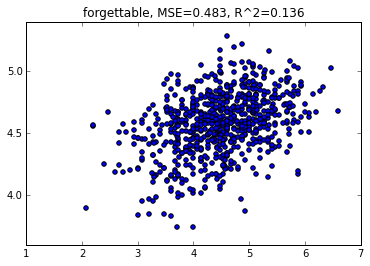

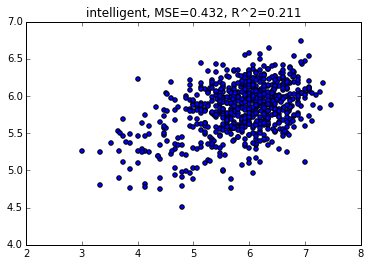

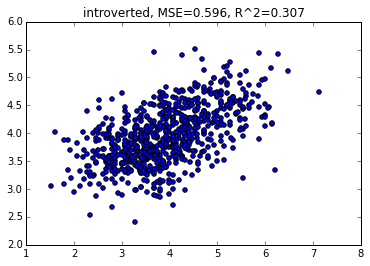

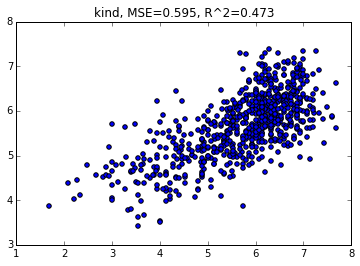

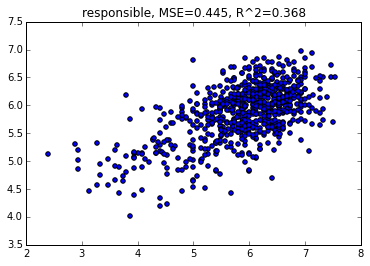

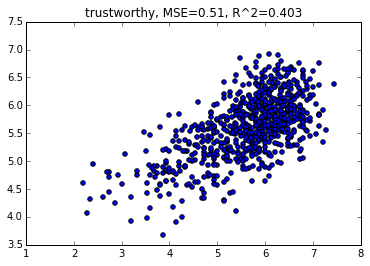

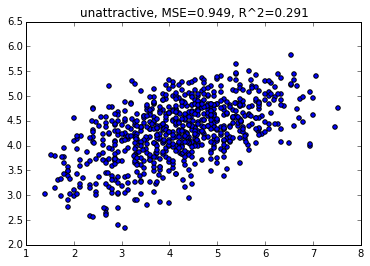

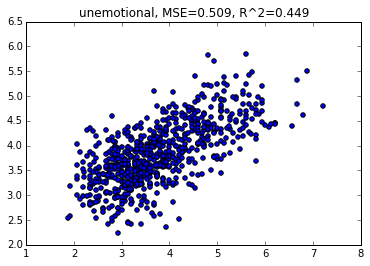

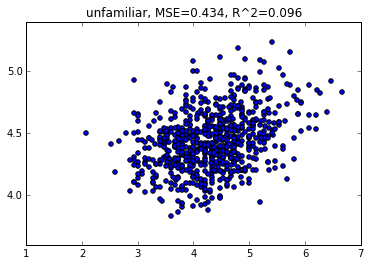

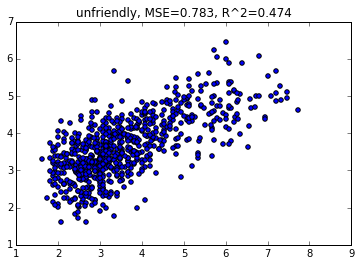

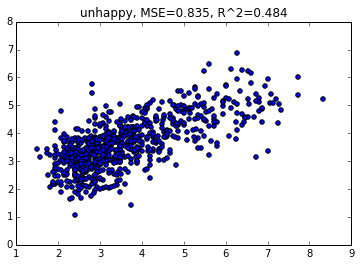

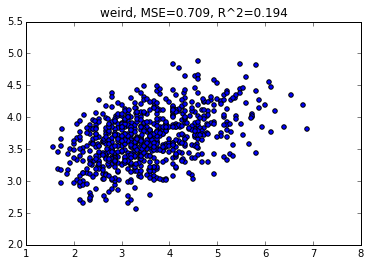

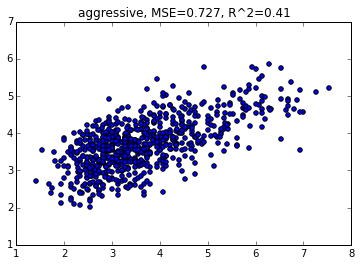

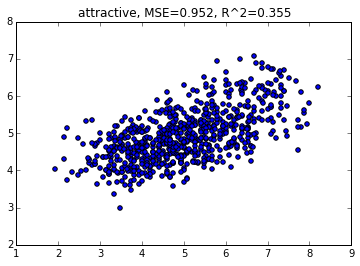

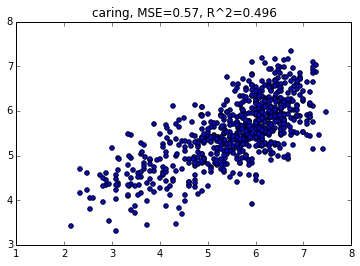

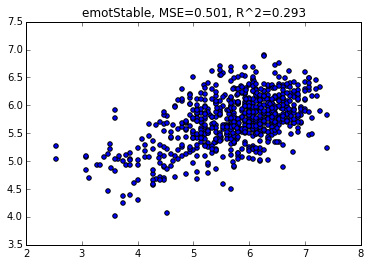

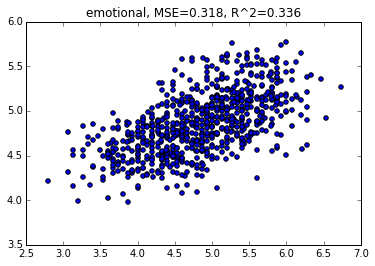

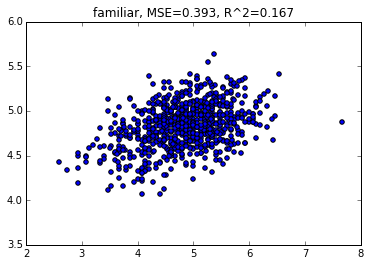

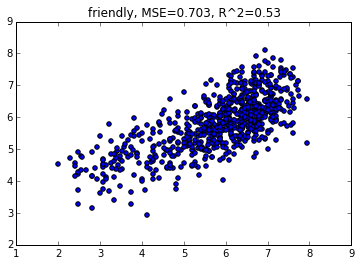

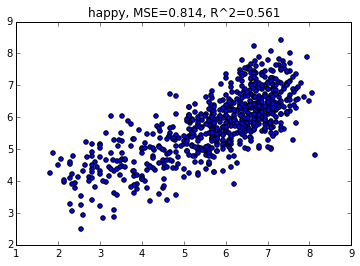

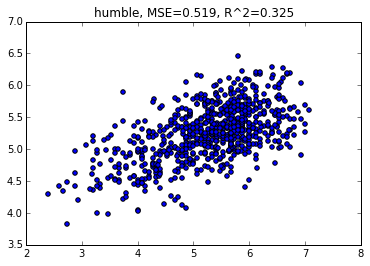

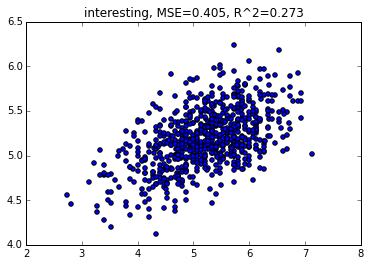

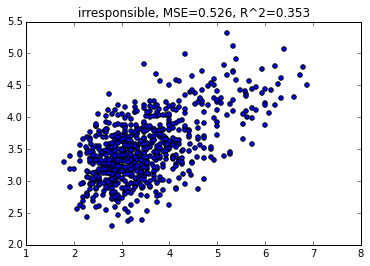

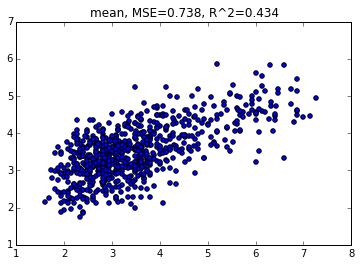

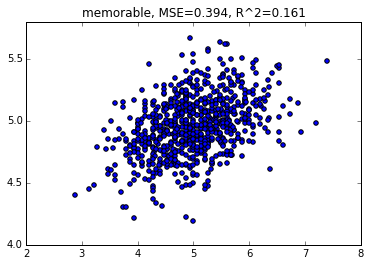

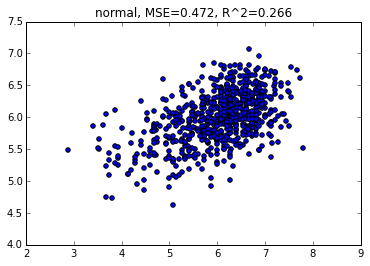

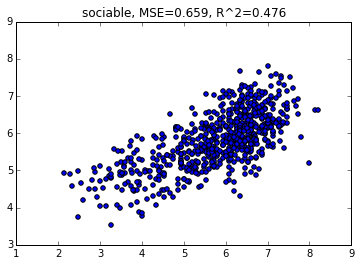

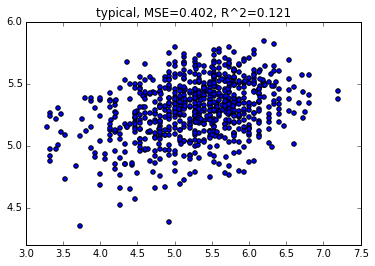

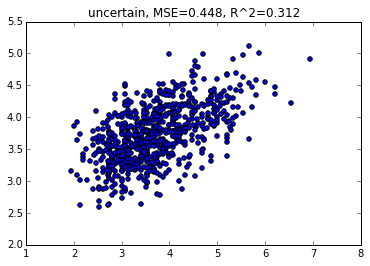

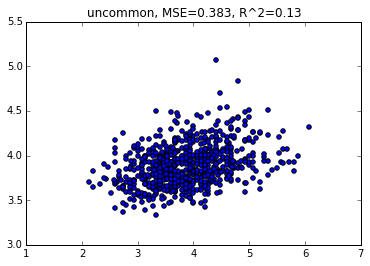

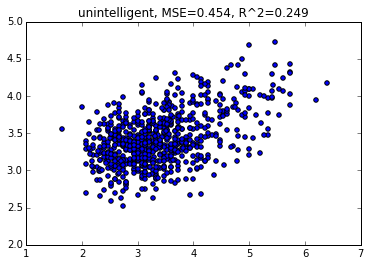

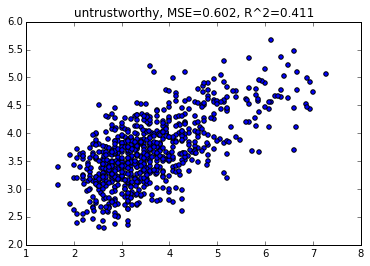

In [16]:
label_MSE_R2 = []
for col in cols:
    label_MSE_R2.append(train_test(X2,df[col].values,col))

In [17]:
clfs = {}
for label, MSE, R2, clf in label_MSE_R2:
    print label, MSE, R2
    clfs[label] = clf
pickle.dump(clfs, open("../data/image_data/tmp/HOG_PCA_CLF.p", "wb"))

atypical 0.362938401862 0.13868315235
boring 0.534474642827 0.211918506077
calm 0.428598241991 0.153911219903
cold 0.797959451694 0.480521734
common 0.325658030458 0.115101631401
confident 0.494790675562 0.244637219045
egotistic 0.61062299888 0.281399119186
emotUnstable 0.5707004773 0.297575840048
forgettable 0.482986993163 0.135900081995
intelligent 0.432057371628 0.210828344838
introverted 0.595551714524 0.306799465049
kind 0.594849422242 0.473423856183
responsible 0.445357324668 0.368404857214
trustworthy 0.510413106157 0.403281412947
unattractive 0.948686342487 0.291117650626
unemotional 0.509167182271 0.449015854554
unfamiliar 0.433684319148 0.096222532182
unfriendly 0.782876079371 0.473689709248
unhappy 0.834771225575 0.483804081192
weird 0.708810423907 0.194097024579
aggressive 0.727381873676 0.410367221594
attractive 0.951707611071 0.35518673058
caring 0.569820073629 0.496346533881
emotStable 0.501151458182 0.292964446395
emotional 0.317683363533 0.33617417581
familiar 0.393456